# <font color='8EC044'> **Proyecto Kaggle**

### **Estudiante:** Iván Steven Cuero Martínez

### **Programa:** Ingeniería Industrial

## <font color='FF7F50'> **Descripción**

Las Pruebas Saber Pro son exámenes estandarizados que se administran en Colombia para evaluar la calidad y el nivel de conocimiento y competencias de los estudiantes de educación superior, es decir, de instituciones de educación superior como universidades y tecnológicos. Estas pruebas son parte de los esfuerzos del Gobierno de Colombia para monitorear y mejorar la calidad de la educación superior en el país.

Estas Pruebas constan cinco componentes genéricos, Inglés, Lectura Crítica, Competencias Ciudadanas, Razonamiento Cuantitativo y Comunicación Escrita.

El trabajo será crear un modelo de clasificación que, para cada estudiante, prediga qué desempeño va a tener: bajo, medio-bajo, medio-alto o alto.

## <font color='FF7F50'> **1. Inicialización**

### <font color='46B8A9'> **1.1. Librerías**

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Datos
import os
from google.colab import files
import pandas as pd
import numpy as np
from itertools import product

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Modelado
!pip install keras-tuner
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
import tensorflow as tf # Framework de deep learning
from tensorflow import keras # API que contiene la mayoría de fucniones para las RN
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from keras_tuner.tuners import RandomSearch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.5 MB/s eta 0:00:00


### <font color='46B8A9'> **1.2. Descarga y carga de datos desde Kaggle**


**Instrucciones:**

**1.** Crear un archivo kaggle.json con el token de autenticación (en Kaggle → hacer clic en el ícono de usuario en la esquina superior derecha → configuración → API → crear nuevo token).

**2.** Subir el archivo kaggle.json a este espacio de trabajo de Colab.

In [2]:
# Subir el archivo kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


**3.** Configurar la autenticación con Kaggle usando el archivo kaggle.json y descargar los archivos de la competencia udea-ai-4-eng-20251-pruebas-saber-pro-colombia en el directorio actual.

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 548MB/s]


**4.** Descomprimir e inspeccionar datos.

In [4]:
!unzip udea*.zip > /dev/null

In [5]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


**5.** Cargar train.csv con pandas.

In [6]:
df = pd.read_csv("train.csv")

### <font color='46B8A9'> **1.3. Descripción general de los datos**

In [7]:
# Obtener el número de filas y columnas del DataFrame
rows, cols = df.shape
print(f'Hay {rows} filas y {cols} columnas en el dataset')

Hay 692500 filas y 21 columnas en el dataset


In [8]:
# Mostrar información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

### <font color='46B8A9'> **1.4. Distribución y participación de variables categóricas**

Número de estudiantes por clase en cada variable categórica:

In [9]:
'''Para cada variable categórica se crea un DataFrame con los valores únicos de la columna como índice, donde la primera
   columna corresponde a la frecuencia absoluta (número de veces que se repite cada valor o categoría), y la segunda columna
   muestra la frecuencia relativa (porcentaje que representa cada categoría respecto al total de observaciones en esa columna)'''

columnas1 = df.select_dtypes(include=['object'])  # Selecciona las columnas categóricas (tipo 'object') del DataFrame

# Crear un nuevo DataFrame con frecuencia absoluta y frecuencia relativa de cada categoría
for columna in columnas1:
    df_count = pd.DataFrame({ "Conteo": df[columna].value_counts(),
                             "Proporción": df[columna].value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'})
    print(df_count)  # Imprime el DataFrame con las frecuencias
    print('-'*70)

                                                    Conteo Proporción
ESTU_PRGM_ACADEMICO                                                  
DERECHO                                              53244     7.69 %
ADMINISTRACION DE EMPRESAS                           51902     7.49 %
CONTADURIA PUBLICA                                   39664     5.73 %
PSICOLOGIA                                           31932     4.61 %
INGENIERIA INDUSTRIAL                                28481     4.11 %
...                                                    ...        ...
DEPORTE Y ACTIVIDADA FISICA                              1      0.0 %
QUIMICA Y FARMACIA                                       1      0.0 %
LICENCIATURA EN EDUCACON FISICA, RECREACION Y D...       1      0.0 %
COMUNICACIÓN SOCIAL Y PERIODISMO                         1      0.0 %
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                    1      0.0 %

[948 rows x 2 columns]
------------------------------------------------------------------

### <font color='46B8A9'> **1.5. Medidas estadísticas de variables numéricas**

Mediana, moda, desviación estándar y quantiles:

In [10]:
''' Seleccionar columnas numéricas (Se excluyen las columnas ID y PERIODO
porque no representan variables numéricas con significado cuantitativo) '''
df[['coef_1', 'coef_2', 'coef_3', 'coef_4']].describe().T

,count,mean,std,min,25%,50%,75%,max
coef_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
coef_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
coef_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
coef_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


### <font color='46B8A9'> **1.6. Datos faltantes**

In [11]:
# Contar la cantidad de valores nulos en cada columna del DataFrame.
df.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773


In [12]:
# Imprimir el número de datos nulos en el dataset
print(f'Los datos nulos en el DataFrame son {df.isna().sum().sum()}')

Los datos nulos en el DataFrame son 297378


In [13]:
# Obtener y mostrar el número total de filas del DataFrame
totalfilas = len(df)
totalfilas

# Calcular y mostrar el porcentaje de valores nulos por columna en un DataFrame
porcentaje_null = pd.DataFrame({"Porcentaje nulos": ((df.isna().sum() / len(df))).mul(100).round(2).astype(str) + ' %'})
porcentaje_null

,Porcentaje nulos
ID,0.0 %
PERIODO,0.0 %
ESTU_PRGM_ACADEMICO,0.0 %
ESTU_PRGM_DEPARTAMENTO,0.0 %
ESTU_VALORMATRICULAUNIVERSIDAD,0.91 %
ESTU_HORASSEMANATRABAJA,4.46 %
FAMI_ESTRATOVIVIENDA,4.64 %
FAMI_TIENEINTERNET,3.85 %
FAMI_EDUCACIONPADRE,3.35 %
FAMI_TIENELAVADORA,5.74 %


En general, la presencia de valores nulos en las columnas del conjunto de datos no representa un problema significativo, ya que la mayoría de ellos se encuentran por debajo del 5% del total de observaciones.

### <font color='46B8A9'> **1.7. Datos duplicados**

In [14]:
# Imprimir el número de datos duplicados en el dataset
print('Los datos duplicados en el DataFrame son', df.duplicated().sum())

Los datos duplicados en el DataFrame son 0


## <font color='FF7F50'> **2. Limpieza y preprocesamiento de datos**

### <font color='46B8A9'> **2.1. Identificación y eliminación de variables (columnas) iguales**

Se observa que en el conjunto de datos existen dos columnas con nombres muy similares: 'FAMI_TIENEINTERNET' y 'FAMI_TIENEINTERNET.1', lo cual sugiere que podrían contener la misma información. Para confirmar esto, se compararon ambas columnas utilizando el método .equals() de pandas, que verifica si todos los elementos de ambas columnas son idénticos. Si el resultado es True, se concluye que las dos columnas son duplicadas y, por lo tanto, es apropiado eliminar una de ellas para evitar redundancia y reducir la dimensionalidad del conjunto de datos.

In [15]:
df1 = df.copy()  # Crea una copia del dataframe original

In [16]:
# Verificar si las columnas 'FAMI_TIENEINTERNET' y 'FAMI_TIENEINTERNET.1' contienen exactamente la misma información
df1['FAMI_TIENEINTERNET'].equals(df1['FAMI_TIENEINTERNET.1'])

True

In [17]:
# Eliminar columna 'FAMI_TIENEINTERNET.1'
df1.drop('FAMI_TIENEINTERNET.1', axis=1, inplace=True)

### <font color='46B8A9'> **2.2. Tratamiento de datos nulos**

Se determinó que varias columnas categóricas del conjunto de datos contenían una pequeña proporción de valores nulos, la mayoría por debajo del 5% del total de observaciones. Dado que este porcentaje es bajo, no representa un problema grave para el análisis. En lugar de eliminar filas o aplicar métodos más complejos de imputación, se opta por reemplazar los valores nulos en estas columnas por la moda, es decir, la categoría más frecuente dentro de cada variable. Esta estrategia permite conservar la totalidad de los datos y reduce el riesgo de introducir sesgos, ya que mantiene la coherencia con la distribución original de cada variable. Además, al tratarse de variables categóricas, esta imputación es adecuada porque preserva la interpretabilidad del conjunto de datos y la simplicidad del proceso de preprocesamiento.



In [18]:
# Calcular la cantidad de valores nulos por columna en el DataFrame
null_counts = df1.isnull().sum()

# Filtrar solo las columnas que tienen al menos un valor nulo
null_counts = null_counts[null_counts > 0]

# Mostrar el número de valores nulos por columna (solo las que tienen nulos)
null_counts

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773
FAMI_TIENEAUTOMOVIL,43623
ESTU_PAGOMATRICULAPROPIO,6498
FAMI_TIENECOMPUTADOR,38103
FAMI_EDUCACIONMADRE,23664


In [19]:
# Iterar sobre todas las columnas categóricas que tienen valores nulos
for column in null_counts.index:
    # Obtener la moda (valor más frecuente) de la columna
    mode_value = df1[column].mode()[0]
    # Reemplazar los valores nulos en la columna con la moda
    df1[column].fillna(mode_value, inplace=True)

# Calcular el total de valores nulos restantes en todo el DataFrame (debería dar 0 si se imputaron todos)
remaining_nulls = df1.isnull().sum().sum()
remaining_nulls

np.int64(0)

In [20]:
# Verificar presencia de nulos
df1.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,0
FAMI_TIENELAVADORA,0


### <font color='46B8A9'> **2.3. Variable ID**

In [21]:
# La siguiente línea modifica directamente el DataFrame df1, estableciendo la columna 'ID' como índice
df1.set_index('ID', inplace=True)

In [22]:
df1

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
ID,,,,,,,,,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287


### <font color='46B8A9'> **2.4. Variable PERIODO**

Se crea una nueva columna llamada 'AÑO' a partir de la variable 'PERIODO', debido a que esta última contiene múltiples categorías que representan periodos académicos específicos (por ejemplo, 20195 o 20212), algunas de las cuales tienen una cantidad de observaciones considerablemente mayor que otras. Esta disparidad en la distribución puede generar desequilibrios en el análisis y en la construcción de los distintos modelos que se van a implementar. Al agrupar los periodos por año, se reduce la complejidad categórica de la variable y se homogeniza la distribución de los datos.

In [23]:
df1.PERIODO.value_counts()

,count
PERIODO,
20195,180873
20203,171838
20212,171412
20183,164818
20194,1472
20213,1178
20202,490
20184,254
20196,165


In [24]:
''' Se crea una nueva columna llamada 'AÑO' debido a que algunas categorías dentro de la variable 'PERIODO' son muy grandes,
 mientras que otras son demasiado pequeñas. Al agrupar los periodos en años, se facilita la interpretación de los resultados
 y se capturan tendencias más generales a lo largo del tiempo, sin perder información relevante de los periodos individuales.'''

# Definir un diccionario para mapear los valores de 'PERIODO' a años
agrupacionPERIODO = {
    20195: 2019,
    20203: 2020,
    20212: 2021,
    20183: 2018,
    20194: 2019,
    20213: 2021,
    20202: 2020,
    20184: 2018,
    20196: 2019
}

# Aplicar el mapeo de 'PERIODO' a 'AÑO' usando el diccionario
df1['AÑO'] = df1['PERIODO'].map(agrupacionPERIODO)

In [25]:
df1.AÑO.value_counts()

,count
AÑO,
2019,182510
2021,172590
2020,172328
2018,165072


### <font color='46B8A9'> **2.5. Variable ESTU_PRGM_ACADEMICO**

Para simplificar el análisis y mejorar la interpretabilidad de los datos, se agrupan las numerosas categorías originales de programas académicos en grupos más generales y manejables. Esta agrupación se realiza mediante una función que clasifica cada programa según palabras clave presentes en su nombre, asegurando que carreras similares se unan bajo una misma categoría amplia. Esta estrategia reduce la alta dimensionalidad que implicaría trabajar con muchas categorías individuales.

In [26]:
def clasificar_carrera(carrera):
    carrera = carrera.upper()

    # Ingenierías
    if 'INGENIER' in carrera or 'INGENIER¿' in carrera or 'INGENIERÌ' in carrera:
        return 'Ingeniería'

    # Ciencias de la Salud
    salud = ['MEDICINA', 'ENFERMER', 'ODONTOLOG', 'FISIOTERAP', 'FARMACIA',
             'NUTRICI', 'TERAPIA', 'OPTOMETR', 'BACTERIOLOG', 'BIOANALISIS',
             'INSTRUMENTACION QUIRURGICA', 'FONOAUDIOLOG', 'GERONTOLOG']
    if any(palabra in carrera for palabra in salud):
        return 'Ciencias de la Salud'

    # Ciencias Sociales y Humanidades
    sociales = ['DERECHO', 'PSICOLOG', 'SOCIOLOG', 'TRABAJO SOCIAL', 'CIENCIA POLITICA',
                'ANTROPOLOG', 'HISTORIA', 'FILOSOF', 'COMUNICACION', 'PERIODISMO']
    if any(palabra in carrera for palabra in sociales):
        return 'Ciencias Sociales y Humanidades'

    # Educación
    if 'EDUCACION' in carrera or 'EDUCACI¿N' in carrera or 'PEDAGOG' in carrera or 'LICENCIATURA' in carrera:
        return 'Educación'

    # Administración y Negocios
    admin = ['ADMINISTRACION', 'ADMINISTRACI¿N', 'ADMINISTRACIÒN', 'NEGOCIOS',
             'FINANZAS', 'CONTADUR', 'ECONOM', 'EMPRESA', 'MERCADEO', 'MARKETING',
             'COMERCIO', 'RELACIONES INTERNACIONALES', 'PUBLICIDAD']
    if any(palabra in carrera for palabra in admin):
        return 'Administración y Negocios'

    # Ciencias Básicas
    basicas = ['BIOLOG', 'QUIMICA', 'FISICA', 'MATEMATIC', 'ESTADISTIC', 'GEOLOG',
               'MICROBIOLOG', 'ECOLOG', 'CIENCIA', 'BIOQUIM']
    if any(palabra in carrera for palabra in basicas):
        return 'Ciencias Básicas'

    # Arte y Diseño
    arte = ['ARTE', 'DISEÑO', 'DISE¿O', 'MUSICA', 'TEATRO', 'DANZA', 'CINE',
            'BELLAS ARTES', 'GASTRONOM', 'CULINARIA']
    if any(palabra in carrera for palabra in arte):
        return 'Arte y Diseño'

    # Arquitectura
    if 'ARQUITECTURA' in carrera or 'URBANISMO' in carrera:
        return 'Arquitectura y Urbanismo'

    # Agronomía y afines
    if 'AGRONOM' in carrera or 'ZOOTECN' in carrera or 'AGROPECUAR' in carrera or 'AGROINDUSTRIAL' in carrera:
        return 'Agronomía y Ciencias Agropecuarias'

    # Tecnología
    if 'TECNOLOG' in carrera or 'INFORMATICA' in carrera or 'SISTEMAS' in carrera:
        return 'Tecnología e Informática'

    # Si no coincide con ninguna categoría anterior
    return 'Otras'

# Aplicar la función a tu columna
df1['PRGM_ACADEMICO'] = df1['ESTU_PRGM_ACADEMICO'].apply(clasificar_carrera)

# Verificar las categorías creadas
df1.PRGM_ACADEMICO.value_counts()

,count
PRGM_ACADEMICO,
Administración y Negocios,198410
Ingeniería,148431
Ciencias Sociales y Humanidades,141503
Educación,64442
Ciencias de la Salud,57211
Otras,37031
Arte y Diseño,16030
Ciencias Básicas,14856
Arquitectura y Urbanismo,11746


### <font color='46B8A9'> **2.6. Variable ESTU_PRGM_DEPARTAMENTO**

Para mejorar el rendimiento del modelo y evitar problemas asociados a variables categóricas con muchas clases poco representadas, se agruparon los departamentos con menos de 2000 registros en una sola categoría llamada "ZONAS DIFÍCIL ACCESO". Esta transformación sobre la columna ESTU_PRGM_DEPARTAMENTO busca reducir la complejidad del modelo y mitigar el riesgo de sobreajuste causado por clases con muy poca frecuencia.

In [27]:
df1['ESTU_PRGM_DEPARTAMENTO'].value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


In [28]:
counts = df1['ESTU_PRGM_DEPARTAMENTO'].value_counts()

# Se crea un umbral para dejar las categorías con un conteo mayor a 2000 registros
umbral = 2000
categorias_a_mantener = counts[counts > umbral].index

# Agrupar las categorías menos frecuentes
df1['ESTU_PRGM_DEPARTAMENTO'] = df1['ESTU_PRGM_DEPARTAMENTO'].apply(lambda x: x if x in categorias_a_mantener else 'ZONAS DIFÍCIL ACCESO')

In [29]:
df1.ESTU_PRGM_DEPARTAMENTO.value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


### <font color='46B8A9'> **2.7. Variable ESTU_VALORMATRICULAUNIVERSIDAD**

La variable 'ESTU_VALORMATRICULAUNIVERSIDAD' contiene categorías en forma de rangos de valores monetarios. Para facilitar su uso en modelos de machine learning, se transforma en una variable numérica asignando a cada rango un valor representativo basado en el promedio del intervalo correspondiente. Esta transformación conserva el orden y la magnitud relativa de los valores, lo cual resulta útil para algoritmos que capturan relaciones numéricas y ordinales, como regresión logística, árboles de decisión y modelos de ensamble. Además, al convertir esta variable en formato numérico se evita la creación de múltiples columnas mediante codificación one-hot, lo que reduce la dimensionalidad del dataset. Esta conversión no solo optimiza el procesamiento, sino que también puede mejorar la precisión del modelo si existe una relación significativa entre el valor de la matrícula y el rendimiento global del estudiante.

In [30]:
df1.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,210335
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528


In [31]:
# Se asigna el valor promedio de pago de matrícula a cada categoría dentro de la variable
valormat = {'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Menos de 500 mil': .250,
    'Entre 500 mil y menos de 1 millón': .75,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Más de 7 millones': 7.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'No pagó matrícula': 0}

# Usar map para transformar los valores
df1['ESTU_VALORMATRICULAUNIVERSIDAD'] = df1['ESTU_VALORMATRICULAUNIVERSIDAD'].map(valormat)

# Contar los valores únicos
df1.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,210335
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528


### <font color='46B8A9'> **2.8. Variable ESTU_HORASSEMANATRABAJA**

Con el fin de convertir la variable ESTU_HORASSEMANATRABAJA en un formato numérico útil para el análisis estadístico y la implementación de modelos de aprendizaje supervisado, se asigna a cada categoría un valor promedio representativo de horas trabajadas por semana. Esta transformación facilita el tratamiento cuantitativo de la variable, mejora la interpretabilidad de los datos y permite que los modelos capturen de forma más precisa la posible relación entre el número de horas trabajadas y la variable respuesta (rendimiento global).

In [32]:
df1.ESTU_HORASSEMANATRABAJA.value_counts()

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,280209
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191


In [33]:
# Se asigna el valor promedio de horas a cada categoría dentro de la variable
horasem = {'0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15.5,
    'Entre 21 y 30 horas': 25.5,
    'Más de 30 horas': 35.5}

# Usar map para transformar los valores
df1['ESTU_HORASSEMANATRABAJA'] = df1['ESTU_HORASSEMANATRABAJA'].map(horasem)

# Contar los valores únicos
df1['ESTU_HORASSEMANATRABAJA'].value_counts()

,count
ESTU_HORASSEMANATRABAJA,
35.5,280209
0.0,116550
15.5,115857
25.5,92693
5.0,87191


### <font color='46B8A9'> **2.9. Variable FAMI_ESTRATOVIVIENDA**

Se transforma la variable 'FAMI_ESTRATOVIVIENDA' para mejorar su utilidad en los modelos de aprendizaje supervisado. Se reemplazan los nombres de los estratos por sus respectivos valores numéricos, preservando así su naturaleza ordinal (es decir, una jerarquía de niveles socioeconómicos). Esta conversión permite que los modelos interpreten correctamente la relación de orden entre los estratos y facilita el procesamiento matemático de la variable.

In [34]:
df1.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,264808
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [35]:
# Se reemplazan los nombres de los estratos por sus valores numéricos, manteniendo su naturaleza ordinal.
# Se asigna el valor -1 a "Sin Estrato" para distinguirlo explícitamente del resto de los estratos,
# tratándolo como una categoría especial fuera del rango ordinal convencional.

df1['FAMI_ESTRATOVIVIENDA'] = df1['FAMI_ESTRATOVIVIENDA'].replace({
    'Estrato 6': 6,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Sin Estrato': -1
    })

df1.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
2,264808
3,210685
1,111991
4,65514
5,23608
6,12605
-1,3289


### <font color='46B8A9'> **2.10. Variables FAMI_EDUCACIONPADRE y FAMI_EDUCACIONMADRE**

Se unifican los valores inciertos de las variables 'FAMI_EDUCACIONPADRE' y 'FAMI_EDUCACIONMADRE' al reemplazar las categorías "No sabe" y "No Aplica" por una única categoría llamada "Indeterminado". Esta transformación se realiza para simplificar el conjunto de datos, reducir la cardinalidad de las variables y evitar la dispersión de información faltante en múltiples etiquetas que representan esencialmente la misma condición de desconocimiento. Con ello, se mejora la calidad de los datos y se facilita la interpretación por parte de los modelos de aprendizaje supervisado.

In [36]:
df1.FAMI_EDUCACIONPADRE.value_counts()

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,151467
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084
Técnica o tecnológica incompleta,22552


In [37]:
df1.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,165408
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
Técnica o tecnológica incompleta,27533
Educación profesional incompleta,22470


In [38]:
''' Se reemplazan las categorías 'No sabe' y 'No Aplica' por 'Indeterminado' en las columnas de educación de madre y padre,
    para unificar los valores inciertos.'''

# Reemplazar valores inciertos en la educación de la madre
df1['FAMI_EDUCACIONMADRE'] = [
    'Indeterminado' if i in ['No sabe', 'No Aplica'] else i
    for i in df1['FAMI_EDUCACIONMADRE'].values
]

# Reemplazar valores inciertos en la educación del padre
df1['FAMI_EDUCACIONPADRE'] = [
    'Indeterminado' if i in ['No sabe', 'No Aplica'] else i
    for i in df1['FAMI_EDUCACIONPADRE'].values
]

In [39]:
df1.FAMI_EDUCACIONPADRE.value_counts()

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,151467
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084
Indeterminado,25821


In [40]:
df1.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,165408
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
Técnica o tecnológica incompleta,27533
Educación profesional incompleta,22470


## <font color='FF7F50'> **3. Selección de variables y preparación de los datos**

### <font color='46B8A9'> **3.1. Selección de variables**

In [41]:
# Mostrar información general del DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692500 entries, 904256 to 933374
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PERIODO                         692500 non-null  int64  
 1   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 2   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 3   ESTU_VALORMATRICULAUNIVERSIDAD  692500 non-null  float64
 4   ESTU_HORASSEMANATRABAJA         692500 non-null  float64
 5   FAMI_ESTRATOVIVIENDA            692500 non-null  int64  
 6   FAMI_TIENEINTERNET              692500 non-null  object 
 7   FAMI_EDUCACIONPADRE             692500 non-null  object 
 8   FAMI_TIENELAVADORA              692500 non-null  object 
 9   FAMI_TIENEAUTOMOVIL             692500 non-null  object 
 10  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 11  ESTU_PAGOMATRICULAPROPIO        692500 non-null  object 
 12  FAMI_TIENECOMPUT

**Análisis de correlación entre variables numéricas y variable respuesta:**

Para evaluar la relación entre las variables predictoras ('ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', coef_1', 'coef_2', 'coef_3', 'coef_4', 'AÑO') y la variable respuesta ('RENDIMIENTO_GLOBAL'), se utilizó el coeficiente de correlación tipo Eta (η), una medida adecuada cuando la variable dependiente es categórica y las independientes son numéricas. Este coeficiente permite cuantificar la fuerza de asociación entre una variable categórica y una continua, arrojando valores entre 0 (sin asociación) y 1 (asociación perfecta). Aplicar esta técnica permite identificar qué variables tienen mayor capacidad explicativa sobre el rendimiento global, lo que es fundamental para la selección de variables relevantes en modelos predictivos.

In [42]:
# 1. Función para calcular el coeficiente de correlación tipo Eta
def correlation_ratio(categories, measurements):
    """
    categories: array-like categórico
    measurements: array-like numérico
    devuelve: eta, valor entre 0 y 1 que mide la asociación
    """
    # Convertimos categorías a enteros 0,1,2,...
    fcat, _ = pd.factorize(categories)
    cats = np.unique(fcat)
    mean_total = np.nanmean(measurements)

    # Suma de cuadrados entre categorías
    ss_between = sum(
        len(measurements[fcat == cat]) *
        (np.nanmean(measurements[fcat == cat]) - mean_total)**2
        for cat in cats
    )
    # Suma total de cuadrados
    ss_total = np.nansum((measurements - mean_total)**2)

    # Eta = sqrt(SS_between / SS_total)
    return np.sqrt(ss_between / ss_total) if ss_total > 0 else np.nan

# 2. Cálculo de η para cada coeficiente
eta_values = {}
for col in ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA',
            'coef_1', 'coef_2', 'coef_3', 'coef_4', 'AÑO']:
    eta = correlation_ratio(df1['RENDIMIENTO_GLOBAL'], df1[col].values)
    eta_values[col] = eta

# 3. Mostrar resultados ordenados
eta_df = pd.DataFrame.from_dict(eta_values, orient='index', columns=['eta']) \
            .sort_values(by='eta', ascending=False)
eta_df

,eta
ESTU_VALORMATRICULAUNIVERSIDAD,0.269710
FAMI_ESTRATOVIVIENDA,0.267715
coef_1,0.252061
coef_2,0.195314
coef_4,0.135324
ESTU_HORASSEMANATRABAJA,0.131308
coef_3,0.060940
AÑO,0.059160


En este caso, la variable ESTU_VALORMATRICULAUNIVERSIDAD mostró la mayor correlación, seguida de FAMI_ESTRATOVIVIENDA, coef_1, coef_2, coef_4 y ESTU_HORASSEMANATRABAJA, lo cual sugiere que estas variables podrían tener un peso predictivo relevante.

**Análisis de correlación entre variables categóricas y variable respuesta:**

Para identificar qué variables categóricas tienen una relación estadísticamente significativa con la variable de respuesta 'RENDIMIENTO_GLOBAL', se utiliza la prueba de Chi-cuadrado de independencia, que permite evaluar si existe una asociación entre dos variables categóricas. Al calcular el valor del estadístico Chi² y su correspondiente p-valor para cada variable, se puede determinar qué características del conjunto de datos están significativamente relacionadas con el rendimiento académico de los estudiantes. Este análisis es fundamental en la etapa de selección de variables, ya que permite reducir la dimensionalidad de los modelos, eliminando variables irrelevantes y conservando aquellas que aportan información útil para la predicción.

In [43]:
from scipy.stats import chi2_contingency

chi2_results = []

# Seleccionar solo las columnas categóricas, excluyendo la variable objetivo
categorical_columns = df1.columns[df1.dtypes == 'object'].tolist()
categorical_columns.remove('RENDIMIENTO_GLOBAL')

# Calcular la prueba Chi-cuadrado para cada variable categórica respecto a la variable objetivo
for column in categorical_columns:
    contingency_table = pd.crosstab(df1[column], df1['RENDIMIENTO_GLOBAL'])  # Tabla de contingencia
    chi2, p_value, _, _ = chi2_contingency(contingency_table)  # Prueba Chi-cuadrado
    chi2_results.append((column, chi2, p_value))  # Guarda resultados

# Convertir los resultados en un DataFrame y ordenar por significancia estadística (p-value)
chi2_results_df = pd.DataFrame(chi2_results, columns=['Variable', 'Chi2', 'p-value'])
chi2_results_df.sort_values(by='p-value', inplace=True)

chi2_results_df

,Variable,Chi2,p-value
0,ESTU_PRGM_ACADEMICO,143741.141869,0.000000
1,ESTU_PRGM_DEPARTAMENTO,27562.948584,0.000000
2,FAMI_TIENEINTERNET,14122.196556,0.000000
3,FAMI_EDUCACIONPADRE,57680.731917,0.000000
4,FAMI_TIENELAVADORA,7823.648464,0.000000
5,FAMI_TIENEAUTOMOVIL,19588.204011,0.000000
7,ESTU_PAGOMATRICULAPROPIO,28125.037722,0.000000
8,FAMI_TIENECOMPUTADOR,12320.133185,0.000000
10,PRGM_ACADEMICO,34174.252131,0.000000
9,FAMI_EDUCACIONMADRE,62165.639131,0.000000


A partir de los resultados de la prueba de Chi-cuadrado, podemos interpretar la relación entre cada variable categórica y la variable de respuesta 'RENDIMIENTO_GLOBAL' evaluando el p-valor asociado a cada una.

**Interpretación de los resultados:**

* p-valor ≤ 0.05: La variable tiene una asociación estadísticamente significativa con RENDIMIENTO_GLOBAL. Es decir, es relevante para el análisis y podría contribuir al modelo predictivo.

* p-valor > 0.05: No hay evidencia suficiente para afirmar que existe una relación entre la variable y RENDIMIENTO_GLOBAL, por lo tanto, puede considerarse irrelevante para efectos de predicción.

La variable 'ESTU_PRIVADO_LIBERTAD' tiene un p-valor = 0.269961, lo cual indica que no hay evidencia estadística suficiente para afirmar que esté asociada al rendimiento académico. Además, presenta un marcado desbalance de clases, con un 99.9 % de los registros en la categoría 'N' (no privado de libertad). Por tanto, puede descartarse tanto del análisis estadístico como de los modelos predictivos, ya que su baja variabilidad y falta de significancia la hacen irrelevante y potencialmente ruidosa para el modelo.

In [44]:
df1.columns

Index(['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2',
       'coef_3', 'coef_4', 'AÑO', 'PRGM_ACADEMICO'],
      dtype='object')

In [45]:
# Se elimina la variable respuesta y variables independientes que no se usarán en el modelo
X_features = df1.drop(['RENDIMIENTO_GLOBAL', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRIVADO_LIBERTAD'], axis=1, inplace=False)

In [46]:
X_features.dtypes

,0
ESTU_PRGM_DEPARTAMENTO,object
ESTU_VALORMATRICULAUNIVERSIDAD,float64
ESTU_HORASSEMANATRABAJA,float64
FAMI_ESTRATOVIVIENDA,int64
FAMI_TIENEINTERNET,object
FAMI_EDUCACIONPADRE,object
FAMI_TIENELAVADORA,object
FAMI_TIENEAUTOMOVIL,object
ESTU_PAGOMATRICULAPROPIO,object
FAMI_TIENECOMPUTADOR,object


### <font color='46B8A9'> **3.2. Transformación de variables categóricas**

In [47]:
# Se identifican las columnas que son binarias (es decir, que tienen exactamente dos categorías distintas)
columnas_binarias = [col for col in X_features.columns if X_features[col].nunique() == 2]
columnas_binarias

['FAMI_TIENEINTERNET',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEAUTOMOVIL',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENECOMPUTADOR']

**Codificación para variables categóricas binarias**:

Se verificó que todas las variables identificadas como binarias contienen únicamente las categorías 'Si' y 'No'. Por lo tanto, se definió un diccionario de mapeo común que asigna el valor 1 a 'Si' y 0 a 'No', lo que permite convertir estas variables categóricas en variables numéricas binarias adecuadas para los modelos predictivos.

In [48]:
# Diccionario de mapeo para las columnas binarias
map_binario = {
    'Si': 1,
    'No': 0
}

# Aplicar el mapeo a todas las columnas binarias
for col in columnas_binarias:
    X_features[col] = X_features[col].map(map_binario)

X_features.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4,AÑO,PRGM_ACADEMICO
ID,,,,,,,,,,,,,,,,,
904256,BOGOTÁ,6.25,5.0,3,1,Técnica o tecnológica incompleta,1,1,0,1,Postgrado,0.322,0.208,0.310,0.267,2021,Ciencias de la Salud
645256,ATLANTICO,3.25,0.0,3,0,Técnica o tecnológica completa,1,0,0,1,Técnica o tecnológica incompleta,0.311,0.215,0.292,0.264,2021,Ciencias Sociales y Humanidades
308367,BOGOTÁ,3.25,35.5,3,1,Secundaria (Bachillerato) completa,1,0,0,0,Secundaria (Bachillerato) completa,0.297,0.214,0.305,0.264,2020,Administración y Negocios
470353,SANTANDER,4.75,0.0,4,1,Indeterminado,1,0,0,1,Secundaria (Bachillerato) completa,0.485,0.172,0.252,0.190,2019,Administración y Negocios
989032,ANTIOQUIA,3.25,25.5,3,1,Primaria completa,1,1,0,1,Primaria completa,0.316,0.232,0.285,0.294,2021,Ciencias Sociales y Humanidades


**Codificación One-Hot Encoding para variables categóricas multiclase:**

In [49]:
# Aplicar One-Hot Encoding (para variables con 3 o más categorías)
# Lista de variables categóricas a transformar
ohe_vars = ['ESTU_PRGM_DEPARTAMENTO', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'PRGM_ACADEMICO', 'AÑO']

# Generar las variables dummies para las columnas seleccionadas
X_features = pd.get_dummies(X_features, columns=ohe_vars)
X_features.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,coef_1,coef_2,...,PRGM_ACADEMICO_Ciencias Sociales y Humanidades,PRGM_ACADEMICO_Ciencias de la Salud,PRGM_ACADEMICO_Educación,PRGM_ACADEMICO_Ingeniería,PRGM_ACADEMICO_Otras,PRGM_ACADEMICO_Tecnología e Informática,AÑO_2018,AÑO_2019,AÑO_2020,AÑO_2021
ID,,,,,,,,,,,,,,,,,,,,,
904256,6.25,5.0,3,1,1,1,0,1,0.322,0.208,...,False,True,False,False,False,False,False,False,False,True
645256,3.25,0.0,3,0,1,0,0,1,0.311,0.215,...,True,False,False,False,False,False,False,False,False,True
308367,3.25,35.5,3,1,1,0,0,0,0.297,0.214,...,False,False,False,False,False,False,False,False,True,False
470353,4.75,0.0,4,1,1,0,0,1,0.485,0.172,...,False,False,False,False,False,False,False,True,False,False
989032,3.25,25.5,3,1,1,1,0,1,0.316,0.232,...,True,False,False,False,False,False,False,False,False,True


Aunque muchos algoritmos de machine learning pueden procesar valores booleanos, convertirlos explícitamente a enteros (0 y 1) evita ambigüedades, garantiza compatibilidad con todas las librerías de modelado y facilita el análisis y visualización de los datos. Esta conversión también ayuda a mantener consistencia en el tipo de datos cuando se combinan con otras variables ya numéricas.

In [50]:
# Convertir columnas booleanas a enteros explícitamente
for col in X_features.columns:
    if X_features[col].dtype == bool:
        X_features[col] = X_features[col].astype(int)

X_features.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,coef_1,coef_2,...,PRGM_ACADEMICO_Ciencias Sociales y Humanidades,PRGM_ACADEMICO_Ciencias de la Salud,PRGM_ACADEMICO_Educación,PRGM_ACADEMICO_Ingeniería,PRGM_ACADEMICO_Otras,PRGM_ACADEMICO_Tecnología e Informática,AÑO_2018,AÑO_2019,AÑO_2020,AÑO_2021
ID,,,,,,,,,,,,,,,,,,,,,
904256,6.25,5.0,3,1,1,1,0,1,0.322,0.208,...,0,1,0,0,0,0,0,0,0,1
645256,3.25,0.0,3,0,1,0,0,1,0.311,0.215,...,1,0,0,0,0,0,0,0,0,1
308367,3.25,35.5,3,1,1,0,0,0,0.297,0.214,...,0,0,0,0,0,0,0,0,1,0
470353,4.75,0.0,4,1,1,0,0,1,0.485,0.172,...,0,0,0,0,0,0,0,1,0,0
989032,3.25,25.5,3,1,1,1,0,1,0.316,0.232,...,1,0,0,0,0,0,0,0,0,1


### <font color='46B8A9'> **3.3. Normalización de variables numéricas (Z-score)**

In [51]:
# Almacenar variables númericas
numcol = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA',
          'coef_1', 'coef_2', 'coef_3', 'coef_4']

# Escalamiento con Z-Score
scaler = StandardScaler()
for col in numcol:
    X_features[[col]] = scaler.fit_transform(X_features[[col]])

X_features

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,coef_1,coef_2,...,PRGM_ACADEMICO_Ciencias Sociales y Humanidades,PRGM_ACADEMICO_Ciencias de la Salud,PRGM_ACADEMICO_Educación,PRGM_ACADEMICO_Ingeniería,PRGM_ACADEMICO_Otras,PRGM_ACADEMICO_Tecnología e Informática,AÑO_2018,AÑO_2019,AÑO_2020,AÑO_2021
ID,,,,,,,,,,,,,,,,,,,,,
904256,1.488838,-1.133390,0.455223,1,1,1,0,1,0.437002,-0.556223,...,0,1,0,0,0,0,0,0,0,1
645256,0.182581,-1.487564,0.455223,0,1,0,0,1,0.346934,-0.481341,...,1,0,0,0,0,0,0,0,0,1
308367,0.182581,1.027071,0.455223,1,1,0,0,0,0.232301,-0.492038,...,0,0,0,0,0,0,0,0,1,0
470353,0.835710,-1.487564,1.352324,1,1,0,0,1,1.771650,-0.941332,...,0,0,0,0,0,0,0,1,0,0
989032,0.182581,0.318723,0.455223,1,1,1,0,1,0.387874,-0.299484,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,-0.905967,-0.389625,-0.441878,1,1,0,1,1,-0.258980,0.117717,...,0,0,0,0,0,0,0,1,0,0
754213,0.182581,1.027071,0.455223,1,1,0,0,1,0.371498,-0.213904,...,1,0,0,0,0,0,0,0,0,1
504185,-0.470548,-1.133390,0.455223,1,1,0,1,1,0.142233,-0.213904,...,0,0,0,0,1,0,1,0,0,0


### <font color='46B8A9'> **3.4. Codificación y distribución de la variable objetivo**

Antes de implementar cualquier modelo predictivo, es necesario preparar adecuadamente la variable objetivo 'RENDIMIENTO_GLOBAL'. Esta columna contiene etiquetas categóricas que representan niveles de desempeño académico (como 'bajo', 'medio-bajo', 'medio-alto' y 'alto'). Por ello, se procede a convertir dichas categorías en valores numéricos discretos mediante un mapeo explícito que preserve su orden jerárquico. Esta transformación permite que los modelos interpreten correctamente la estructura ordinal de la variable, lo que facilita tanto el entrenamiento como la evaluación del desempeño del clasificador.

In [52]:
df1.RENDIMIENTO_GLOBAL.value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


In [53]:
# Separar la variable respuesta (dependiente) y luego convertirla en valores discretos para la predicción
y_target = df1['RENDIMIENTO_GLOBAL']  # Variable a predecir

# Diccionario para transformar los valores categóricos en numéricos
y_target_map = {'alto': 3, 'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2}

# Aplicar la transformación directamente a la Serie y_target
y_target = y_target.map(y_target_map)

# Verificar distribución de clases
y_target.value_counts()

,count
RENDIMIENTO_GLOBAL,
3,175619
0,172987
1,172275
2,171619


In [54]:
# Gráfico variable respuesta a partir de y_target
counts = y_target.value_counts().reset_index()
counts.columns = ['RENDIMIENTO_GLOBAL', 'Count']  # Renombrar las columnas

# Calcular porcentaje y etiqueta
counts['Percentage'] = (counts['Count'] / counts['Count'].sum()) * 100
counts['Label'] = counts['Count'].astype(str) + ' (' + counts['Percentage'].round(1).astype(str) + '%)'

# Crear gráfico
fig = px.bar(
    counts,
    x='RENDIMIENTO_GLOBAL',
    y='Count',
    color='RENDIMIENTO_GLOBAL',
    title='Distribución de RENDIMIENTO_GLOBAL',
    labels={'RENDIMIENTO_GLOBAL': 'Rendimiento Global', 'Count': 'Frecuencia'},
    text='Label',
    width=1000,
    height=600
)

fig.show()

In [55]:
counts

,RENDIMIENTO_GLOBAL,Count,Percentage,Label
0,3,175619,25.360144,175619 (25.4%)
1,0,172987,24.980072,172987 (25.0%)
2,1,172275,24.877256,172275 (24.9%)
3,2,171619,24.782527,171619 (24.8%)


In [56]:
y_target

,RENDIMIENTO_GLOBAL
ID,
904256,2
645256,0
308367,0
470353,3
989032,1
...,...
25096,2
754213,0
504185,1


In [57]:
# Asignar las características independientes a X
X = X_features

# Asignar la columna objetivo a la variable y
y = y_target

# Verificar forma de X y y
X.shape, y.shape

((692500, 74), (692500,))

## <font color='FF7F50'> **4. Aplicación del algoritmo Redes Neuronales**

### <font color='46B8A9'> **4.1. Modelo base**

In [58]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Las etiquetas no están en formato one-hot, entonces se convierten
y_train_one_hot = to_categorical(y_train, num_classes=4)  # Se ajusta a 4 (número de clases)
y_test_one_hot = to_categorical(y_test, num_classes=4)

num_filas = X_train.shape[0]
num_columnas = X_train.shape[1]

# Red neuronal base (ANN 1)
ann1 = Sequential()

# Capa de entrada: Usamos Input(shape=) como primera capa
ann1.add(Input(shape=(X_train.shape[1],)))  # Especifica la forma de entrada (numero columnas o variables)
ann1.add(Dense(256, activation='relu'))  # Capa oculta 1
ann1.add(keras.layers.Dropout(0.3))
ann1.add(Dense(128, activation='tanh'))  # Capa oculta 2
ann1.add(keras.layers.Dropout(0.3))
ann1.add(Dense(128, activation='tanh'))  # Capa oculta 3
ann1.add(Dense(32, activation='relu'))  # Capa oculta 4
ann1.add(Dense(4, activation='softmax'))  # Capa de salida con 4 neuronas (por 4 clases)

# Resumen de la arquitectura y parámetros totales
ann1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,868 (284.64 KB)

 Trainable params: 72,868 (284.64 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Compilación del modelo
ann1.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.0001),
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = ann1.fit(
    X_train, y_train_one_hot,
    epochs=50,  # Número máximo de epochs
    validation_data=(X_test, y_test_one_hot),
    callbacks=[early_stopping])

Epoch 1/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.3755 - loss: 1.2873 - val_accuracy: 0.4142 - val_loss: 1.2360
Epoch 2/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.4101 - loss: 1.2429 - val_accuracy: 0.4161 - val_loss: 1.2311
Epoch 3/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - accuracy: 0.4152 - loss: 1.2356 - val_accuracy: 0.4180 - val_loss: 1.2299
Epoch 4/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 89s 4ms/step - accuracy: 0.4174 - loss: 1.2319 - val_accuracy: 0.4188 - val_loss: 1.2262
Epoch 5/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 73s 4ms/step - accuracy: 0.4188 - loss: 1.2300 - val_accuracy: 0.4201 - val_loss: 1.2248
Epoch 6/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 92s 5ms/step - accuracy: 0.4213 - loss: 1.2270 - val_accuracy: 0.4210 - val_loss: 1.2248
Epoch 7/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.4208 - loss: 1.2269 - val_accuracy: 0.4205 - val_loss: 1.2242
Epoch 8/50
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - accuracy: 

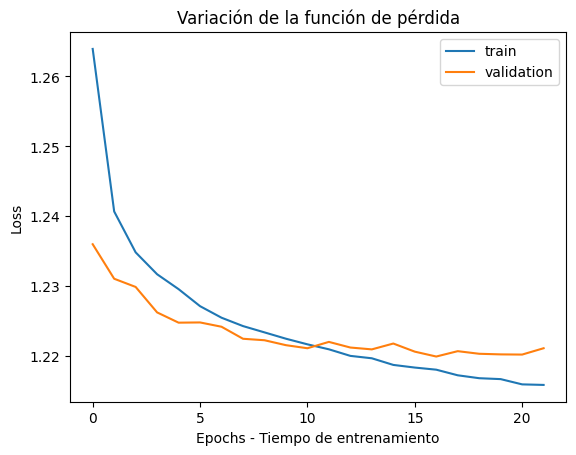

In [60]:
# Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Variación de la función de pérdida')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

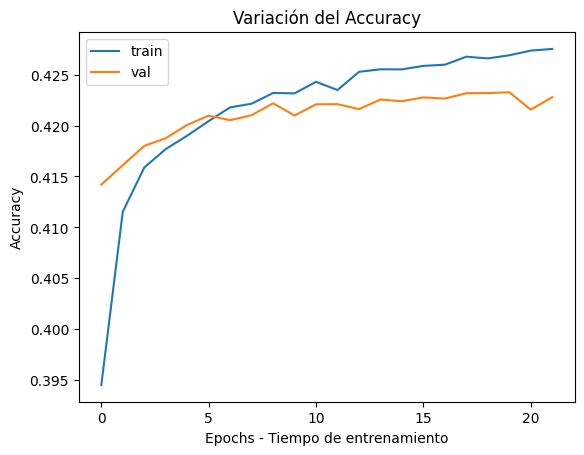

In [61]:
# Visualización de las curvas de Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Variación del Accuracy')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

### <font color='46B8A9'> **4.2. Modelo con hiperparámetros optimizados**

In [62]:
# Definición de Hyper Model: Modelo para Tunear
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Especifica la forma de entrada (columnas o variables)

    # Definción de la primera capa oculta con ajuste de hiperparámetros:
    hp_activation_1 = hp.Choice('activation_1', values=['relu', 'tanh'])
    model.add(keras.layers.Dense(units=256, activation=hp_activation_1))

    # Definición de la capa de dropout con ajustes de hiperparámetro: droupout_rate
    hp_dropout_rate1 = hp.Float('dropout_rate_1', min_value= 0.1, max_value= 0.5, step=0.1)
    model.add(keras.layers.Dropout(hp_dropout_rate1))

    # Definición de la segunda capa oculta con optimización de hiperparámetros
    hp_activation_2 = hp.Choice('activation_2', values=['relu', 'tanh'])
    model.add(keras.layers.Dense(units=128, activation=hp_activation_2))

    # Definición de la capa de dropout con ajustes de hiperparámetro: droupout_rate
    hp_dropout_rate2 = hp.Float('dropout_rate_2', min_value= 0.1, max_value= 0.5, step=0.1)
    model.add(keras.layers.Dropout(hp_dropout_rate2))

    # Definición de la tercera capa oculta con optimización de hiperparámetros: Función de activación
    hp_units_3 = hp.Int('units_3', min_value=32, max_value=128, step=32)
    hp_activation_3 = hp.Choice('activation_3', values=['relu', 'tanh'])
    model.add(keras.layers.Dense(units=hp_units_3, activation=hp_activation_3))

    # Definición de la cuarta capa oculta con optimización de hiperparámetros: Función de activación
    hp_units_4 = hp.Int('units_4', min_value=32, max_value=64, step=16)
    hp_activation_4 = hp.Choice('activation_4', values=['relu', 'tanh'])
    model.add(keras.layers.Dense(units=hp_units_4, activation=hp_activation_4))

    # Capa de salida
    model.add(keras.layers.Dense(4, activation='softmax'))

    #Nuevamente, se define primero el hiperparametro y luego
    # Definición del compilador con optimización del hiperparámetro lr
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
        )

    return model

In [63]:
# Para porder ejecutar la búsqueda aleatoria tenemos que definir el tuner random search

# Definir/inicializar el Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2,
    directory= 'Results_tuner',  # Donde se van a guardar los resultados de la búsqueda
    project_name = 'Pruebas_saber_Pro'
)

In [64]:
# Ejecución del Tuner
tuner.search(X_train, y_train_one_hot, epochs=5, validation_data=(X_test, y_test_one_hot))

Trial 3 Complete [00h 13m 04s]
val_accuracy: 0.40284235775470734

Best val_accuracy So Far: 0.4144957810640335
Total elapsed time: 00h 38m 44s


In [65]:
# Mostrar el mejor modelo obtenido en la búsqueda
for h_param in [f"units_{i}" for i in range(3, 5)] + [f"activation_{i}" for i in range(1, 5)] + ['learning_rate']:
    print(f"{h_param}: {tuner.get_best_hyperparameters()[0].get(h_param)}")

units_3: 64
units_4: 32
activation_1: tanh
activation_2: tanh
activation_3: tanh
activation_4: relu
learning_rate: 0.001


In [66]:
# Almacenar el mejor modelo
best_model = tuner.get_best_models()[0]

# Definir la arquitectura del modelo según los hiperparámetros óptimos
best_model.build(input_shape=(X_train.shape[1]))

# Resumen de la arquitectura del modelo
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,564 (244.39 KB)

 Trainable params: 62,564 (244.39 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Ajuste de la red neuronal con hiperparámetros óptimos
history2 = best_model.fit(X_train, y_train_one_hot, epochs=15, validation_data=(X_test, y_test_one_hot))

# Cuál es la epoch con max val_accuracy
val_accuracy_per_epoch = history2.history['val_accuracy']
best_epoch = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch))+1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 71s 5ms/step - accuracy: 0.4108 - loss: 1.2402 - val_accuracy: 0.4145 - val_loss: 1.2338
Epoch 2/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.4130 - loss: 1.2386 - val_accuracy: 0.4158 - val_loss: 1.2343
Epoch 3/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - accuracy: 0.4119 - loss: 1.2384 - val_accuracy: 0.4158 - val_loss: 1.2314
Epoch 4/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 73s 4ms/step - accuracy: 0.4150 - loss: 1.2369 - val_accuracy: 0.4150 - val_loss: 1.2340
Epoch 5/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.4148 - loss: 1.2357 - val_accuracy: 0.4162 - val_loss: 1.2312
Epoch 6/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 92s 5ms/step - accuracy: 0.4154 - loss: 1.2337 - val_accuracy: 0.4159 - val_loss: 1.2311
Epoch 7/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 73s 4ms/step - accuracy: 0.4158 - loss: 1.2339 - val_accuracy: 0.4148 - val_loss: 1.2307
Epoch 8/15
15149/15149 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 

Con base en lo anterior, el mejor modelo fue el ajustado manualmente, ya que obtuvo una mayor precisión (accuracy). Por lo tanto, ann1 es el modelo elegido para enviar a Kaggle. Se procede a preprocesar el conjunto de test para realizar las predicciones y su posterior envío.

## <font color='FF7F50'> **5. Predicción sobre test y generación de resultados**

### <font color='46B8A9'> **5.1. Carga del dataset test y preprocesamiento de datos**

In [68]:
# Se cargan los datos de test para aplicar el preprocesamineto anterior
df_test = pd.read_csv("test.csv")
df_test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


**Eliminación de columnas iguales:**

In [69]:
# Verificar si las columnas 'FAMI_TIENEINTERNET' y 'FAMI_TIENEINTERNET.1' contienen exactamente la misma información
df_test['FAMI_TIENEINTERNET'].equals(df_test['FAMI_TIENEINTERNET.1'])

# Eliminar columna 'FAMI_TIENEINTERNET.1'
df_test.drop('FAMI_TIENEINTERNET.1', axis=1, inplace=True)

**Tratamiento de datos nulos:**

In [70]:
# Calcular la cantidad de valores nulos por columna en el DataFrame
null_counts = df_test.isnull().sum()

# Filtrar solo las columnas que tienen al menos un valor nulo
null_counts = null_counts[null_counts > 0]

# Mostrar el número de valores nulos por columna (solo las que tienen nulos)
null_counts

,0
ESTU_VALORMATRICULAUNIVERSIDAD,2723
ESTU_HORASSEMANATRABAJA,13379
FAMI_ESTRATOVIVIENDA,13795
FAMI_TIENEINTERNET,11539
FAMI_EDUCACIONPADRE,9993
FAMI_TIENELAVADORA,17259
FAMI_TIENEAUTOMOVIL,18918
ESTU_PAGOMATRICULAPROPIO,2807
FAMI_TIENECOMPUTADOR,16439
FAMI_EDUCACIONMADRE,10223


In [71]:
# Iterar sobre todas las columnas categóricas que tienen valores nulos
for column in null_counts.index:
    # Obtener la moda (valor más frecuente) de la columna
    mode_value = df_test[column].mode()[0]
    # Reemplazar los valores nulos en la columna con la moda
    df_test[column].fillna(mode_value, inplace=True)

# Calcular el total de valores nulos restantes en todo el DataFrame (debería dar 0 si se imputaron todos)
remaining_nulls = df_test.isnull().sum().sum()
remaining_nulls

np.int64(0)

In [72]:
# Verificar presencia de nulos
df_test.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,0
FAMI_TIENELAVADORA,0


**Variable ID:**

In [73]:
df_test_ids = df_test['ID'].values

In [74]:
df_test = df_test.drop(df_test.columns[[0]], axis=1)
df_test.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


**Variable PERIODO:**

In [75]:
# Se crea una nueva columna llamada AÑO ya que hay unas categorias muy grandes y las otras demasiado pequeñas
# Definir un diccionario para mapear los valores de 'PERIODO' a años
agrupacionPERIODO2 = {
    20195: 2019,
    20203: 2020,
    20212: 2021,
    20183: 2018,
    20194: 2019,
    20213: 2021,
    20202: 2020,
    20184: 2018,
    20196: 2019
}

# Aplicar el mapeo de 'PERIODO' a 'AÑO' usando el diccionario
df_test['AÑO'] = df_test['PERIODO'].map(agrupacionPERIODO2)

# Contar los valores únicos
df_test.AÑO.value_counts()

,count
AÑO,
2019,78246
2020,74108
2021,73907
2018,70525


**Variable ESTU_PRGM_ACADEMICO:**

In [76]:
def clasificar_carrera(carrera):
    carrera = carrera.upper()

    # Ingenierías
    if 'INGENIER' in carrera or 'INGENIER¿' in carrera or 'INGENIERÌ' in carrera:
        return 'Ingeniería'

    # Ciencias de la Salud
    salud = ['MEDICINA', 'ENFERMER', 'ODONTOLOG', 'FISIOTERAP', 'FARMACIA',
             'NUTRICI', 'TERAPIA', 'OPTOMETR', 'BACTERIOLOG', 'BIOANALISIS',
             'INSTRUMENTACION QUIRURGICA', 'FONOAUDIOLOG', 'GERONTOLOG']
    if any(palabra in carrera for palabra in salud):
        return 'Ciencias de la Salud'

    # Ciencias Sociales y Humanidades
    sociales = ['DERECHO', 'PSICOLOG', 'SOCIOLOG', 'TRABAJO SOCIAL', 'CIENCIA POLITICA',
                'ANTROPOLOG', 'HISTORIA', 'FILOSOF', 'COMUNICACION', 'PERIODISMO']
    if any(palabra in carrera for palabra in sociales):
        return 'Ciencias Sociales y Humanidades'

    # Educación
    if 'EDUCACION' in carrera or 'EDUCACI¿N' in carrera or 'PEDAGOG' in carrera or 'LICENCIATURA' in carrera:
        return 'Educación'

    # Administración y Negocios
    admin = ['ADMINISTRACION', 'ADMINISTRACI¿N', 'ADMINISTRACIÒN', 'NEGOCIOS',
             'FINANZAS', 'CONTADUR', 'ECONOM', 'EMPRESA', 'MERCADEO', 'MARKETING',
             'COMERCIO', 'RELACIONES INTERNACIONALES', 'PUBLICIDAD']
    if any(palabra in carrera for palabra in admin):
        return 'Administración y Negocios'

    # Ciencias Básicas
    basicas = ['BIOLOG', 'QUIMICA', 'FISICA', 'MATEMATIC', 'ESTADISTIC', 'GEOLOG',
               'MICROBIOLOG', 'ECOLOG', 'CIENCIA', 'BIOQUIM']
    if any(palabra in carrera for palabra in basicas):
        return 'Ciencias Básicas'

    # Arte y Diseño
    arte = ['ARTE', 'DISEÑO', 'DISE¿O', 'MUSICA', 'TEATRO', 'DANZA', 'CINE',
            'BELLAS ARTES', 'GASTRONOM', 'CULINARIA']
    if any(palabra in carrera for palabra in arte):
        return 'Arte y Diseño'

    # Arquitectura
    if 'ARQUITECTURA' in carrera or 'URBANISMO' in carrera:
        return 'Arquitectura y Urbanismo'

    # Agronomía y afines
    if 'AGRONOM' in carrera or 'ZOOTECN' in carrera or 'AGROPECUAR' in carrera or 'AGROINDUSTRIAL' in carrera:
        return 'Agronomía y Ciencias Agropecuarias'

    # Tecnología
    if 'TECNOLOG' in carrera or 'INFORMATICA' in carrera or 'SISTEMAS' in carrera:
        return 'Tecnología e Informática'

    # Si no coincide con ninguna categoría anterior
    return 'Otras'

# Aplicar la función a tu columna
df_test['PRGM_ACADEMICO'] = df_test['ESTU_PRGM_ACADEMICO'].apply(clasificar_carrera)

# Verificar las categorías creadas
df_test.PRGM_ACADEMICO.value_counts()

,count
PRGM_ACADEMICO,
Administración y Negocios,85115
Ingeniería,63956
Ciencias Sociales y Humanidades,60561
Educación,27231
Ciencias de la Salud,24670
Otras,15733
Arte y Diseño,6995
Ciencias Básicas,6330
Arquitectura y Urbanismo,4962


**Variable ESTU_PRGM_DEPARTAMENTO:**

In [77]:
counts = df_test['ESTU_PRGM_DEPARTAMENTO'].value_counts()

# Se crea un umbral para dejar las categorías con un conteo mayor a 1000 registros
umbral = 1000
categorias_a_mantener = counts[counts > umbral].index

# Agrupar las categorías menos frecuentes
df_test['ESTU_PRGM_DEPARTAMENTO'] = df_test['ESTU_PRGM_DEPARTAMENTO'].apply(lambda x: x if x in categorias_a_mantener else 'ZONAS DIFICIL ACCESO')

# Contar los valores únicos
df_test.ESTU_PRGM_DEPARTAMENTO.value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,120714
ANTIOQUIA,35900
VALLE,19183
ATLANTICO,17696
SANTANDER,12198
NORTE SANTANDER,9606
BOLIVAR,8779
BOYACA,6017
CUNDINAMARCA,6017


**Variable ESTU_VALORMATRICULAUNIVERSIDAD:**

In [78]:
# Se asigna el valor promedio de pago de matrícula a cada categoría dentro de la variable
valormat = {'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Menos de 500 mil': .250,
    'Entre 500 mil y menos de 1 millón': .75,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Más de 7 millones': 7.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'No pagó matrícula': 0}

# Usar map para transformar los valores
df_test['ESTU_VALORMATRICULAUNIVERSIDAD'] = df_test['ESTU_VALORMATRICULAUNIVERSIDAD'].map(valormat)

# Contar los valores únicos
df_test.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,89646
3.25,55193
0.25,34589
0.75,33564
4.75,29855
7.75,29061
6.25,16558
0.00,8320


**Variable ESTU_HORASSEMANATRABAJA:**

In [79]:
# Se asigna el valor promedio de horas a cada categoría dentro de la variable
horasem = {'0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15.5,
    'Entre 21 y 30 horas': 25.5,
    'Más de 30 horas': 35.5}

# Usar map para transformar los valores
df_test['ESTU_HORASSEMANATRABAJA'] = df_test['ESTU_HORASSEMANATRABAJA'].map(horasem)

# Contar los valores únicos
df_test.ESTU_HORASSEMANATRABAJA.value_counts()

,count
ESTU_HORASSEMANATRABAJA,
35.5,119568
0.0,50422
15.5,49386
25.5,39931
5.0,37479


**Variable FAMI_ESTRATOVIVIENDA:**

In [80]:
# Se reemplazan los nombres de los estratos por sus valores numéricos, manteniendo su naturaleza ordinal.
# Se asigna el valor -1 a "Sin Estrato" para distinguirlo explícitamente del resto de los estratos,
# tratándolo como una categoría especial fuera del rango ordinal convencional.

df_test['FAMI_ESTRATOVIVIENDA'] = df_test['FAMI_ESTRATOVIVIENDA'].replace({
    'Estrato 6': 6,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Sin Estrato': -1
    })

df_test.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
2,113083
3,90719
1,48092
4,27823
5,10194
6,5451
-1,1424


**Variables FAMI_EDUCACIONPADRE y FAMI_EDUCACIONMADRE:**

In [81]:
''' Se reemplazan las categorías 'No sabe' y 'No Aplica' por 'Indeterminado' en las columnas de educación de madre y padre,
    para unificar los valores inciertos.'''

# Reemplazar valores inciertos en la educación de la madre
df_test['FAMI_EDUCACIONMADRE'] = [
    'Indeterminado' if i in ['No sabe', 'No Aplica'] else i
    for i in df_test['FAMI_EDUCACIONMADRE'].values
]

# Reemplazar valores inciertos en la educación del padre
df_test['FAMI_EDUCACIONPADRE'] = [
    'Indeterminado' if i in ['No sabe', 'No Aplica'] else i
    for i in df_test['FAMI_EDUCACIONPADRE'].values
]

In [82]:
df_test.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,70872
Primaria incompleta,42149
Técnica o tecnológica completa,38571
Educación profesional completa,36477
Secundaria (Bachillerato) incompleta,34566
Primaria completa,24399
Postgrado,20049
Técnica o tecnológica incompleta,11650
Educación profesional incompleta,9647


In [83]:
df_test.FAMI_EDUCACIONPADRE.value_counts()

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,64831
Primaria incompleta,53432
Educación profesional completa,35412
Secundaria (Bachillerato) incompleta,30641
Técnica o tecnológica completa,27045
Primaria completa,24131
Postgrado,19287
Educación profesional incompleta,11744
Indeterminado,11021


### <font color='46B8A9'> **5.2. Preparación y transformación de los datos**

In [84]:
df_test.columns

Index(['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_EDUCACIONMADRE', 'coef_1', 'coef_2', 'coef_3', 'coef_4', 'AÑO',
       'PRGM_ACADEMICO'],
      dtype='object')

In [85]:
# Se eliminan variables independientes que no se usarán en el modelo
X_features_test = df_test.drop(['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRIVADO_LIBERTAD'], axis=1, inplace=False)

In [86]:
# Se identifican las columnas que son binarias (es decir, que tienen exactamente dos categorías distintas)
columnas_binarias = [col for col in X_features_test.columns if X_features_test[col].nunique() == 2]
columnas_binarias

['FAMI_TIENEINTERNET',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEAUTOMOVIL',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENECOMPUTADOR']

**Codificación para variables categóricas binarias**:

In [87]:
# Diccionario de mapeo para las columnas binarias
map_binario = {
    'Si': 1,
    'No': 0
}

# Aplicar el mapeo a todas las columnas binarias
for col in columnas_binarias:
    X_features_test[col] = X_features_test[col].map(map_binario)

X_features_test.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4,AÑO,PRGM_ACADEMICO
0,BOLIVAR,0.25,5.0,3,1,Técnica o tecnológica completa,1,0,1,1,Primaria completa,0.328,0.219,0.317,0.247,2018,Ciencias Sociales y Humanidades
1,ANTIOQUIA,3.25,25.5,2,1,Secundaria (Bachillerato) completa,1,0,0,1,Técnica o tecnológica completa,0.227,0.283,0.296,0.324,2020,Administración y Negocios
2,BOGOTÁ,1.75,0.0,3,1,Secundaria (Bachillerato) incompleta,1,0,0,1,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247,2021,Ingeniería
3,SUCRE,1.75,25.5,1,0,Primaria incompleta,1,0,0,0,Primaria incompleta,0.160,0.408,0.217,0.294,2019,Administración y Negocios
4,ATLANTICO,3.25,15.5,2,1,Secundaria (Bachillerato) completa,1,0,0,1,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286,2021,Administración y Negocios


**Codificación One-Hot Encoding para variables categóricas multiclase:**

In [88]:
# Aplicar One-Hot Encoding (para variables con 3 o más categorías)
# Lista de variables categóricas a transformar
ohe_vars = ['ESTU_PRGM_DEPARTAMENTO', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'PRGM_ACADEMICO', 'AÑO']

# Generar las variables dummies para las columnas seleccionadas
X_features_test = pd.get_dummies(X_features_test, columns=ohe_vars)
X_features_test.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,coef_1,coef_2,...,PRGM_ACADEMICO_Ciencias Sociales y Humanidades,PRGM_ACADEMICO_Ciencias de la Salud,PRGM_ACADEMICO_Educación,PRGM_ACADEMICO_Ingeniería,PRGM_ACADEMICO_Otras,PRGM_ACADEMICO_Tecnología e Informática,AÑO_2018,AÑO_2019,AÑO_2020,AÑO_2021
0,0.25,5.0,3,1,1,0,1,1,0.328,0.219,...,True,False,False,False,False,False,True,False,False,False
1,3.25,25.5,2,1,1,0,0,1,0.227,0.283,...,False,False,False,False,False,False,False,False,True,False
2,1.75,0.0,3,1,1,0,0,1,0.285,0.228,...,False,False,False,True,False,False,False,False,False,True
3,1.75,25.5,1,0,1,0,0,0,0.160,0.408,...,False,False,False,False,False,False,False,True,False,False
4,3.25,15.5,2,1,1,0,0,1,0.209,0.283,...,False,False,False,False,False,False,False,False,False,True


In [89]:
# Convertir columnas booleanas a enteros explícitamente
for col in X_features_test.columns:
    if X_features_test[col].dtype == bool:
        X_features_test[col] = X_features_test[col].astype(int)

X_features_test.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,coef_1,coef_2,...,PRGM_ACADEMICO_Ciencias Sociales y Humanidades,PRGM_ACADEMICO_Ciencias de la Salud,PRGM_ACADEMICO_Educación,PRGM_ACADEMICO_Ingeniería,PRGM_ACADEMICO_Otras,PRGM_ACADEMICO_Tecnología e Informática,AÑO_2018,AÑO_2019,AÑO_2020,AÑO_2021
0,0.25,5.0,3,1,1,0,1,1,0.328,0.219,...,1,0,0,0,0,0,1,0,0,0
1,3.25,25.5,2,1,1,0,0,1,0.227,0.283,...,0,0,0,0,0,0,0,0,1,0
2,1.75,0.0,3,1,1,0,0,1,0.285,0.228,...,0,0,0,1,0,0,0,0,0,1
3,1.75,25.5,1,0,1,0,0,0,0.160,0.408,...,0,0,0,0,0,0,0,1,0,0
4,3.25,15.5,2,1,1,0,0,1,0.209,0.283,...,0,0,0,0,0,0,0,0,0,1


**Normalización de variables numéricas (Z-score):**

In [90]:
# Almacenar variables númericas
numcol = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA',
          'coef_1', 'coef_2', 'coef_3', 'coef_4']

# Escalamiento con Z-Score
scaler = StandardScaler()
for col in numcol:
    X_features_test[[col]] = scaler.fit_transform(X_features_test[[col]])

X_features_test

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,coef_1,coef_2,...,PRGM_ACADEMICO_Ciencias Sociales y Humanidades,PRGM_ACADEMICO_Ciencias de la Salud,PRGM_ACADEMICO_Educación,PRGM_ACADEMICO_Ingeniería,PRGM_ACADEMICO_Otras,PRGM_ACADEMICO_Tecnología e Informática,AÑO_2018,AÑO_2019,AÑO_2020,AÑO_2021
0,-1.125063,-1.128201,0.454059,1,1,0,1,1,0.492496,-0.433304,...,1,0,0,0,0,0,1,0,0,0
1,0.181963,0.322415,-0.441946,1,1,0,0,1,-0.339797,0.243260,...,0,0,0,0,0,0,0,0,1,0
2,-0.471550,-1.482010,0.454059,1,1,0,0,1,0.138153,-0.338162,...,0,0,0,1,0,0,0,0,0,1
3,-0.471550,0.322415,-1.337952,0,1,0,0,0,-0.891912,1.564675,...,0,0,0,0,0,0,0,1,0,0
4,0.181963,-0.385203,-0.441946,1,1,0,0,1,-0.488126,0.243260,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,0.181963,1.030033,-1.337952,1,1,1,1,1,-0.825988,1.585817,...,0,0,0,0,0,0,0,1,0,0
296782,-0.471550,-1.482010,1.350064,1,1,0,0,1,1.670891,-0.803300,...,1,0,0,0,0,0,1,0,0,0
296783,0.181963,1.030033,0.454059,1,1,0,0,1,0.195837,-0.116164,...,1,0,0,0,0,0,0,0,0,1
296784,1.488990,-0.385203,0.454059,1,1,0,0,1,0.302964,-0.433304,...,0,0,0,1,0,0,0,1,0,0


### <font color='46B8A9'> **5.3. Generación de predicciones y envío a Kaggle**

In [91]:
# Obtener predicciones
preds_test_data = ann1.predict(X_features_test)

9275/9275 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


In [92]:
preds_test_data.shape

(296786, 4)

In [93]:
# Como la salida de la red es un array, se usa argmax para obtener el índice del valor máximo
preds_test_data = preds_test_data.argmax(axis=1)

In [94]:
preds_test_data

array([3, 2, 3, ..., 2, 3, 3])

In [95]:
preds_test_data.shape

(296786,)

In [96]:
# Reversar el mapping
rmapi = {v:k for k,v in y_target_map.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]

In [97]:
# Crear el df
submission = pd.DataFrame([df_test_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,medio-bajo
296782,209415,medio-alto
296783,239074,medio-alto
296784,963852,alto


In [98]:
# Guardar el archivo
submission.to_csv("my_submission.csv", index=False)

In [99]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,medio-alto
499179,alto
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,alto
519909,bajo


In [100]:
submission.shape

(296786, 2)

In [101]:
!kaggle competitions submit -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia -f my_submission.csv -m "final submission with neural network"

100% 4.03M/4.03M [00:00<00:00, 12.9MB/s]
Successfully submitted to UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia